In [44]:
import pandas as pd
import matplotlib as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler

In [45]:
data = pd.read_csv('XL axiata.csv')
data.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-14,3.550,3.550,3.530,3.540,3.402463,1600
1,2021-06-15,3.353,3.353,3.350,3.350,3.219845,2600
2,2021-06-16,3.660,3.720,3.570,3.720,3.575470,12200
3,2021-06-17,3.608,3.608,3.608,3.608,3.467821,400
4,2021-06-18,3.598,3.598,3.598,3.598,3.458210,2400


<Axes: xlabel='Date'>

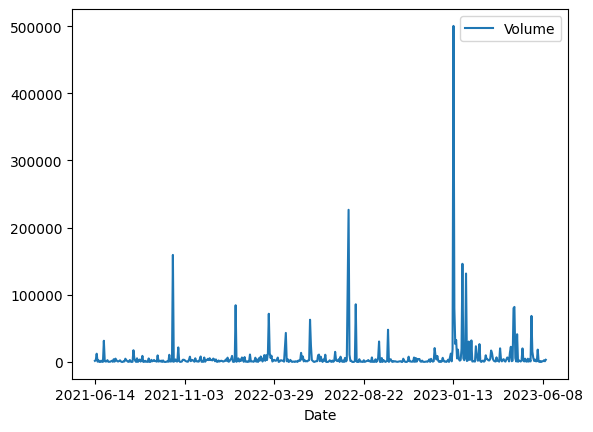

In [46]:
data.plot(x="Date", y="Volume")

In [47]:
# memebersihkan data yang 0
def clean(data):
  vol = data["Volume"].values
  clean = []
  for i in range (len(vol)):
    if vol[i]==0:
      data = data.drop([i])
      
  return data


from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [48]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

## Menggunakan 3 input

In [73]:
inp_param = 5
data_clean = clean(data)
volume = data_clean['Volume'].values
X, y = split_sequence(volume, inp_param)

# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['input-'+str(i+1) for i in range(inp_param-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['output'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

df.head()

,input-5,input-4,input-3,input-2,input-1,output
0,1600,2600,12200,400,2400,1900
1,2600,12200,400,2400,1900,200
2,12200,400,2400,1900,200,100
3,400,2400,1900,200,100,31500
4,2400,1900,200,100,31500,1100


In [74]:
# Split data
training = pd.DataFrame(df.iloc[:359, :].values)

test = pd.DataFrame(df.iloc[359:, :].values)

In [75]:
scaler= MinMaxScaler()
training_x = training.iloc[:, 0:5]
training_y = training.iloc[:, 5:]

X_norm= scaler.fit_transform(training_x)
X_norm
# y_norm= scaler.fit_transform(df_y)

array([[2.99880048e-03, 4.99800080e-03, 2.41903239e-02, 5.99760096e-04,
        4.59816074e-03],
       [4.99800080e-03, 2.41903239e-02, 5.99760096e-04, 4.59816074e-03,
        3.59856058e-03],
       [2.41903239e-02, 5.99760096e-04, 4.59816074e-03, 3.59856058e-03,
        1.99920032e-04],
       ...,
       [3.83846461e-02, 2.91883247e-01, 1.09956018e-02, 4.79808077e-03,
        1.25949620e-02],
       [2.91883247e-01, 1.09956018e-02, 4.79808077e-03, 1.25949620e-02,
        2.62894842e-01],
       [1.09956018e-02, 4.79808077e-03, 1.25949620e-02, 2.62894842e-01,
        2.59896042e-03]])

In [76]:
x_test = test.iloc[:, :5]
y_test = test.iloc[:, 5:]
y_test.set_axis(["y_test"], axis="columns")

,y_test
0,30300
1,3100
2,3400
3,32000
4,600
...,...
79,800
80,1200
81,2500
82,1000


## Decision tree

In [99]:
from sklearn import tree

#klasifikasi menggunakan decision tree

model_tree = tree.DecisionTreeClassifier(random_state=3, max_depth=1)
model_tree.fit(X_norm, training_y)
y_pred1=model_tree.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error
mae1 = mean_squared_error(y_test, y_pred1)
mae1

304624761.9047619

In [101]:
from sklearn.metrics import mean_absolute_percentage_error
mape1 = mean_absolute_percentage_error(y_test, y_pred1)
mape1

0.7933377154702095

## KNN

In [115]:
# import knn
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=30)
model_knn.fit(X_norm, training_y)
y_pred2=model_knn.predict(x_test)

In [116]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(y_test, y_pred2)
mae

341075854.2328042

In [117]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred2)
mape

10.776654191734385

In [120]:
df_y_pred = pd.DataFrame(y_pred2,columns=['y_pred'])

df_hasil = pd.concat([y_test, df_y_pred], axis=1)
df_hasil

,5,y_pred
0,30300,9590.000000
1,3100,22053.333333
2,3400,10050.000000
3,32000,8120.000000
4,600,20190.000000
...,...,...
79,800,8200.000000
80,1200,14933.333333
81,2500,19016.666667
82,1000,23203.333333


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_n = GaussianNB()
model_n.fit(X_norm, training_y)
y_pred3=model_n.predict(x_test)

In [125]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(y_test, y_pred3)
mae

256066309.52380952

In [126]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred3)
mape

2.037522970102048